11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.8946 - loss: 0.3418 - val_accuracy: 0.9848 - val_loss: 0.0540
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.9843 - loss: 0.0493 - val_accuracy: 0.9875 - val_loss: 0.0472
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9885 - val_loss: 0.0431
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9927 - loss: 0.0238 - val_accuracy: 0.9878 - val_loss: 0.0458
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9897 - val_loss: 0.0379
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9871 - loss: 0.0455

Test accuracy: 0.9894


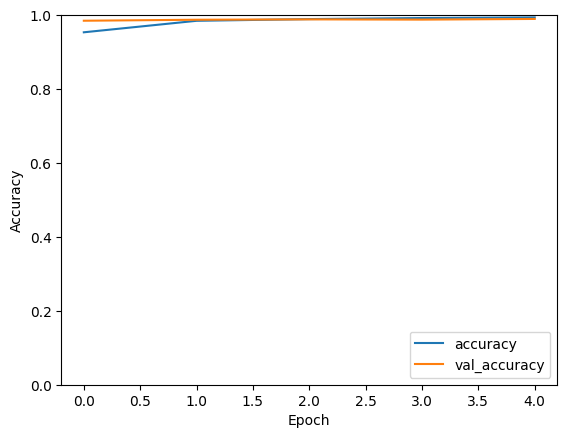

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


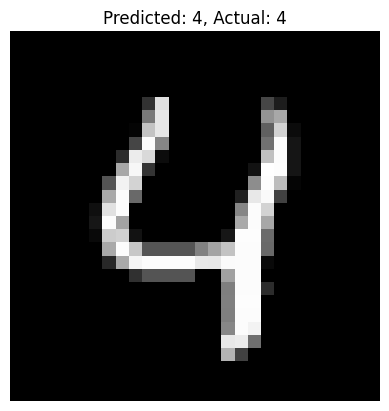

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to add a channel dimension (for grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Step 2: Build the neural network model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Step 6: Visualize training history (Optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Step 7: Make predictions (Optional)
predictions = model.predict(x_test)

# Show the first 5 predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}')
    plt.axis('off')

